# Principal Component Analysis

Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm, we will just have a lecture on this topic, but no full machine learning project (although we will walk through the cancer set with PCA).

## PCA Review

Make sure to watch the video lecture and theory presentation for a full overview of PCA! 
Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. For example:

<img src='PCA.png' />

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set again since it had so many features.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [24]:
cancer.keys()

dict_keys(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [25]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

In [4]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [27]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)

In [10]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [11]:
x_pca = pca.transform(scaled_data)

In [12]:
scaled_data.shape

(569, 30)

In [13]:
x_pca.shape

(569, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

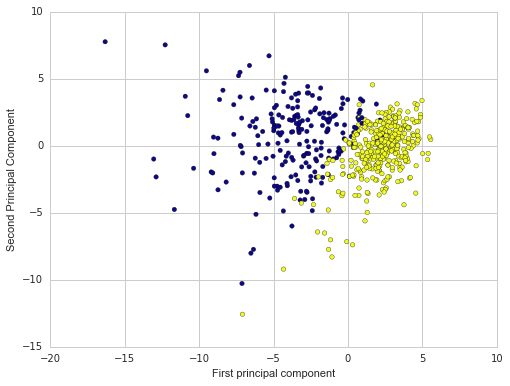

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [14]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [15]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

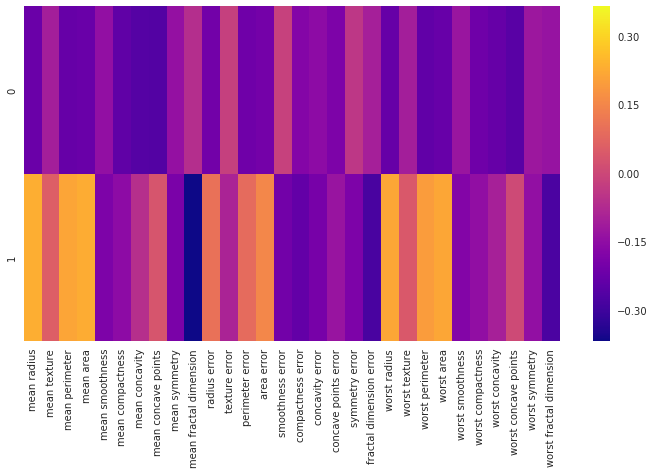

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!

# Use two principal components in a logistic regression

In [22]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0,0.5,'Second Principal Component')

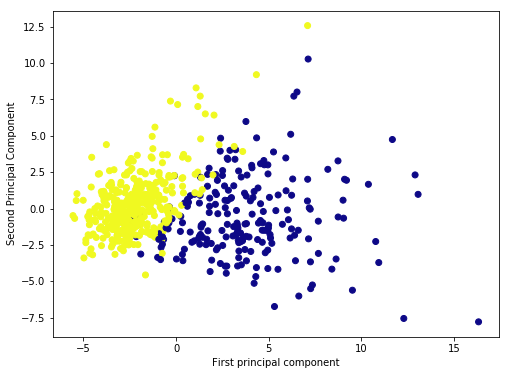

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [29]:
x_pca[:,0]

array([ 9.19283683,  2.3878018 ,  5.73389628,  7.1229532 ,  3.93530207,
        2.38024715,  2.23888331,  2.1432985 ,  3.17492429,  6.35174679,
       -0.81041377,  2.65110048,  8.18503446,  0.34212591,  4.34237919,
        4.07565618,  0.23005502,  4.41801092,  4.94870355, -1.23706336,
       -1.57816123, -3.55733637,  4.73321079,  4.20852421,  4.94963207,
        7.09856285,  3.5102626 ,  3.06405389,  4.00726414,  1.71530973,
        6.05944551,  2.9022361 ,  4.55478269,  4.99060272,  2.98534079,
        2.76636916,  1.29619877, -3.7493134 , -0.9980689 ,  0.76526412,
       -2.15095347, -0.09333139,  9.08799968,  0.99045377, -0.29354655,
        5.38094041, -4.58193667,  1.70000689, -2.13644528, -1.567479  ,
       -3.54290556, -3.15781405, -3.45048854,  3.30255095, -0.67461929,
       -2.85815844,  4.64873887,  2.17686288, -3.72145899, -4.13596294,
       -2.38583566, -2.57888325,  4.75911215, -2.31413225,  1.69160792,
        1.81230541, -2.78592476, -3.51864834,  4.33000265, -3.26

In [30]:
x_pca[:,1]

array([ 1.94858307e+00, -3.76817174e+00, -1.07517380e+00,  1.02755891e+01,
       -1.94807157e+00,  3.94992890e+00, -2.69003128e+00,  2.34024401e+00,
        3.39181295e+00,  7.72717407e+00, -2.65927550e+00,  6.65679266e-02,
        2.70097649e+00, -9.68279261e-01,  4.86108331e+00,  2.97706118e+00,
       -1.56475773e+00,  1.41867033e+00, -4.11433352e+00, -1.88214954e-01,
        5.72808192e-01,  1.66294990e+00,  3.30496373e+00, -5.12836651e+00,
       -1.54375229e+00,  2.01861034e+00,  2.17162512e+00, -1.87655235e+00,
        5.37242161e-01, -1.52370502e+00, -7.57177451e-01,  4.00529551e+00,
        3.37536154e-01, -1.13258891e+00,  7.58423243e-01, -3.54355942e-01,
        9.13196276e-01, -1.41347312e+00, -3.35129292e+00,  8.86243953e-01,
       -1.92399162e+00,  2.26075201e+00,  2.01867310e+00,  9.84930020e-01,
       -1.37099091e-01, -1.34876978e-01,  1.48422032e+00,  2.35227179e+00,
        9.58296095e-02, -1.20843321e+00, -1.28249558e+00, -1.68895860e+00,
       -4.98218714e-01, -

In [32]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [42]:
pca = pd.DataFrame(data=x_pca)

In [43]:
pca['cancer'] = cancer['target']

In [45]:
pca.head()

0          1  cancer
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0

In [52]:
X = pca.drop('cancer',axis=1) # all the label names minus the target
y = pca['cancer'] # the column you want to predict
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

             precision    recall  f1-score   support

          0       0.93      0.95      0.94        66
          1       0.97      0.95      0.96       105

avg / total       0.95      0.95      0.95       171



array([[ 63,   3],
       [  5, 100]])

### You can compare this to similar scores with GridSearch/Support Vector Machines